# Sherlock Dataset Battery Life Predictor
A battery life prediction model, based on the sherlock preview dataset.

By: Mats van Liempd

Version: 1.0.0

In [49]:
import sklearn as skl
import numpy as np
import matplotlib as mpl
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/sherlock/T4.csv")
df.head(n=10)
df["Battery_timestamp"] = pd.to_datetime(df["Battery_timestamp"])
df.sort_values(by="Battery_timestamp", ascending=False)

C:\Users\Mats van Liempd\AppData\Local\Temp\ipykernel_28992\3039955353.py:8: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/sherlock/T4.csv")


,Userid,UUID,Version,CpuHertz,CPU_0,CPU_1,CPU_2,CPU_3,Total_CPU,TotalMemory_freeSize,...,tot_iowait,tot_irq,tot_softirq,ctxt,btime,processes,procs_running,procs_blocked,connectedWifi_SSID,connectedWifi_Level
156016,97bb95f55a,1463620805472,2.3.3,2.4 GHz,0.000000,0.000000,0.000000,4.761905,1.190476,6173152.0,...,199081.0,791.0,598353.0,400429973.0,1.463488e+09,2775505.0,2.0,0.0,0x27527C830CC63772051EFDFCB2432659,-48.0
156015,97bb95f55a,1463620800336,2.3.3,2.4 GHz,5.000000,0.000000,0.000000,4.761905,2.440476,4668424.0,...,199080.0,791.0,598341.0,400420061.0,1.463488e+09,2775413.0,1.0,0.0,0x27527C830CC63772051EFDFCB2432659,-48.0
156014,97bb95f55a,1463620795295,2.3.3,2.4 GHz,3.846154,0.000000,100.000000,0.000000,25.961538,10132746.0,...,199077.0,791.0,598307.0,400404781.0,1.463488e+09,2775335.0,2.0,0.0,0x27527C830CC63772051EFDFCB2432659,-48.0
156013,97bb95f55a,1463620790083,2.3.3,2.4 GHz,4.761905,0.000000,4.761905,4.761905,3.571429,7201456.0,...,199072.0,791.0,598277.0,400382268.0,1.463488e+09,2775197.0,1.0,0.0,0x27527C830CC63772051EFDFCB2432659,-48.0
156012,97bb95f55a,1463620784976,2.3.3,2.4 GHz,0.000000,0.000000,0.000000,0.000000,0.000000,6687538.0,...,199071.0,791.0,598269.0,400375845.0,1.463488e+09,2775119.0,2.0,0.0,0x27527C830CC63772051EFDFCB2432659,-48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139838,97bb95f55a,1463531842018,2.3.3,2.4 GHz,0.000000,0.000000,0.000000,4.761905,1.190476,532628.0,...,62757.0,230.0,214978.0,133777521.0,1.463488e+09,931663.0,1.0,0.0,0x27527C830CC63772051EFDFCB2432659,-52.0
142964,97bb95f55a,1463547832249,2.3.3,2.4 GHz,0.000000,0.000000,0.000000,0.000000,0.000000,5908842.0,...,77967.0,330.0,274348.0,174470326.0,1.463488e+09,1259348.0,1.0,0.0,0x27527C830CC63772051EFDFCB2432659,-47.0
143104,97bb95f55a,1463548547758,2.3.3,2.4 GHz,77.777780,78.947370,94.736850,8.333334,64.948840,1925880.0,...,78445.0,337.0,277096.0,176387088.0,1.463488e+09,1276884.0,5.0,0.0,0x27527C830CC63772051EFDFCB2432659,-47.0
144895,97bb95f55a,1463558402233,2.3.3,2.4 GHz,9.523809,22.222223,0.000000,0.000000,7.936508,731664.0,...,99281.0,405.0,328137.0,215493881.0,1.463488e+09,1496753.0,1.0,0.0,0x3352A141D7A60F64879A4235D387F36B,-127.0


In [50]:
selected_features = [
    "CpuHertz",
    "CPU_0", "CPU_1", "CPU_2", "CPU_3", "Total_CPU",
    "TotalMemory_max_size", "TotalMemory_total_size",
    "Battery_current_avg", "Battery_health", "Battery_technology",
    "Battery_scale", "Battery_voltage", "Battery_temperature",
    "Battery_plugged", "Battery_status",
    "MemTotal", "LowTotal", "HighTotal", "SwapTotal",
    "connectedWifi_SSID", "connectedWifi_Level", "Battery_level"
]

In [51]:
# Drop unnecessary columns (identifiers, constants, peripheral counters, kernel stats, etc.)
df = df.drop(columns=[

    "Userid", "UUID", "Version",
    "Battery_icon_small", "Battery_invalid_charger", "Battery_online",
    "Battery_present", "Battery_scale",
    "MemFree", "Buffers", "Cached", "SwapCached", "Active", "Inactive",
    "Active_anon", "Inactive_anon", "Active_file", "Inactive_file",
    "Unevictable", "Mlocked", "HighFree", "LowFree", "SwapFree", "Dirty",
    "Writeback", "AnonPages", "Mapped", "Shmem", "Slab", "SReclaimable",
    "SUnreclaim", "KernelStack", "PageTables", "CommitLimit",
    "Committed_AS", "VmallocTotal", "VmallocUsed", "VmallocChunk",
    "msmgpio_cpu0", "msmgpio_sum_cpu123",
    "wcd9xxx_cpu0", "wcd9xxx_sum_cpu123",
    "pn547_cpu0", "pn547_sum_cpu123",
    "cypress_touchkey_cpu0", "cypress_touchkey_sum_cpu123",
    "synaptics_rmi4_i2c_cpu0", "synaptics_rmi4_i2c_sum_cpu123",
    "sec_headset_detect_cpu0", "sec_headset_detect_sum_cpu123",
    "flip_cover_cpu0", "flip_cover_sum_cpu123",
    "home_key_cpu0", "home_key_sum_cpu123",
    "volume_down_cpu0", "volume_down_sum_cpu123",
    "volume_up_cpu0", "volume_up_sum_cpu123",
    "companion_cpu0", "companion_sum_cpu123",
    "SLIMBUS_cpu0", "SLIMBUS_sum_cpu123",
    "function_call_interrupts_cpu0", "function_call_interrupts_sum_cpu123",
    "cpu123_intr_prs", "ctxt", "btime", 
    "processes", "procs_running", "procs_blocked",
    "Traffic_MobileRxPackets", "Traffic_MobileTxPackets",
    "Traffic_TotalRxPackets", "Traffic_TotalTxPackets",
    "Traffic_TotalWifiRxPackets", "Traffic_TotalWifiTxPackets",
    "Traffic_MobileRxBytes", "Traffic_MobileTxBytes",
    "Traffic_TotalRxBytes", "Traffic_TotalTxBytes",
    "Traffic_TotalWifiRxBytes", "Traffic_TotalWifiTxBytes",
    "Traffic_timestamp"
], errors="ignore")

# Remove rows where the battery is plugged in
df = df[df["Battery_plugged"] != 1]

# Convert categorical variables to numerical codes
bool_map = {"yes": 1, "no": 0, "Yes": 1, "No": 0, True: 1, False: 0}
df.replace(bool_map, inplace=True)

# Encode remaining categorical columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category").cat.codes

In [52]:
# --- Check for missing values in each column ---
missing_summary = df.isna().sum().reset_index()
missing_summary.columns = ["Column", "Missing_Count"]

# Add total and percentage of missing values
total_rows = len(df)
missing_summary["Missing_%"] = (missing_summary["Missing_Count"] / total_rows * 100).round(2)

# Show only columns that actually have missing values
missing_summary = missing_summary[missing_summary["Missing_Count"] > 0]

# Display the summary sorted by most missing first
missing_summary = missing_summary.sort_values("Missing_Count", ascending=False)

missing_summary

,Column,Missing_Count,Missing_%
1,CPU_0,150,0.15
2,CPU_1,150,0.15
3,CPU_2,150,0.15
4,CPU_3,150,0.15
5,Total_CPU,150,0.15
6,TotalMemory_freeSize,143,0.14
7,TotalMemory_max_size,143,0.14
8,TotalMemory_total_size,143,0.14
9,TotalMemory_used_size,143,0.14
27,tot_idle,143,0.14


In [53]:
# Show all rows that contain at least one missing value
rows_with_missing = df[df.isna().any(axis=1)]

# Optionally display which specific columns are missing in each row
rows_with_missing

,CpuHertz,CPU_0,CPU_1,CPU_2,CPU_3,Total_CPU,TotalMemory_freeSize,TotalMemory_max_size,TotalMemory_total_size,TotalMemory_used_size,...,SwapTotal,tot_user,tot_nice,tot_system,tot_idle,tot_iowait,tot_irq,tot_softirq,connectedWifi_SSID,connectedWifi_Level
662,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
4167,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
5664,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
12956,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
13829,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148254,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
149062,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
149063,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
149092,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN


In [ ]:
df.dropna(inplace=True)
df["drain_rate_percent_per_s"] = (
    df["Battery_level"].shift(1) - df["Battery_level"]
) / (df["Battery_timestamp"] - df["Battery_timestamp"].shift(1)).dt.total_seconds()

df["drain_rate_percent_per_h"] = df["drain_rate_percent_per_s"] * 3600
df["drain_rate_percent_per_h"] = df["drain_rate_percent_per_h"].clip(lower=0)

selected_features.append("drain_rate_percent_per_s")
selected_features.append("drain_rate_percent_per_h")


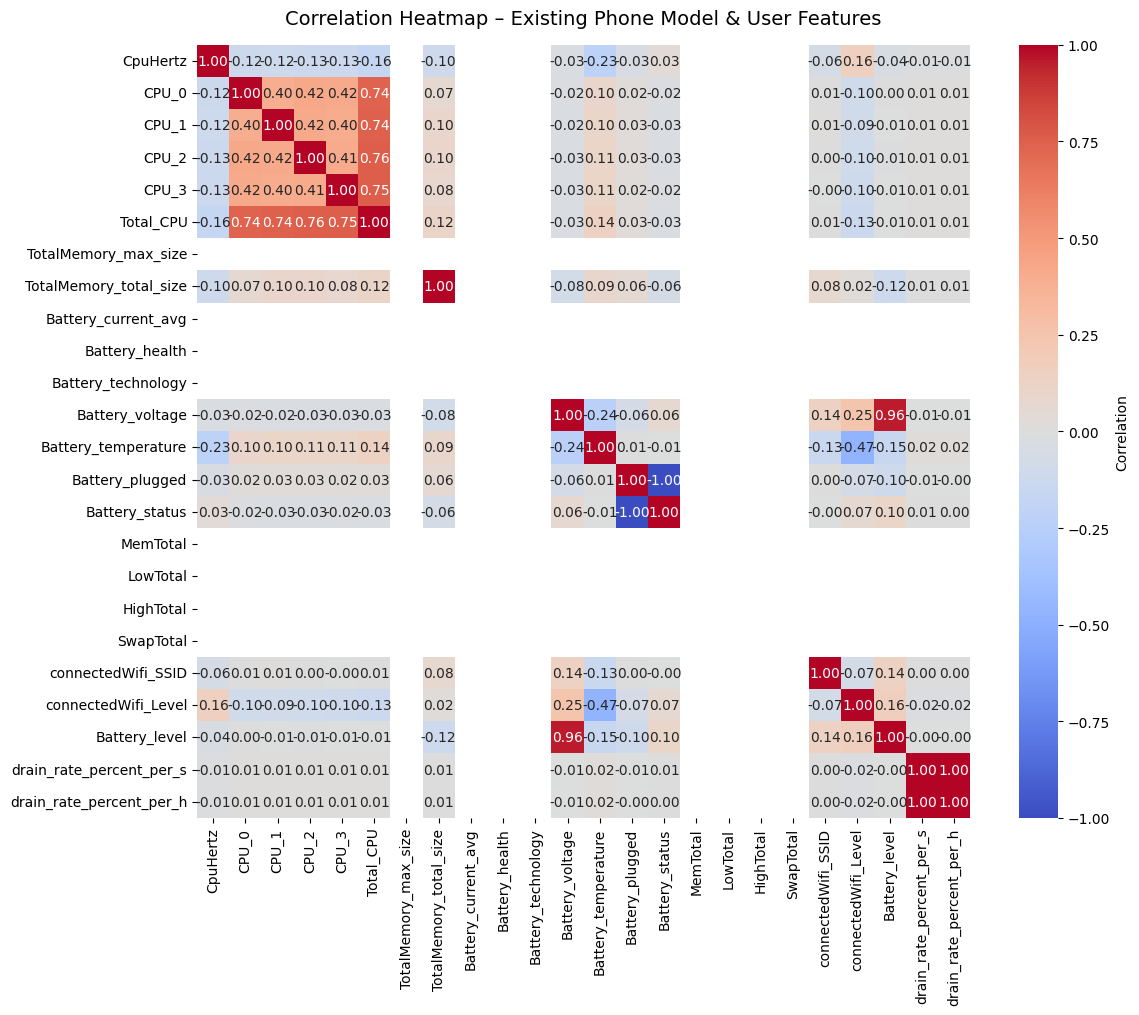

In [55]:
available = [col for col in selected_features if col in df.columns]
df_filtered = df[available].copy()

corr = df_filtered.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"label": "Correlation"})
plt.title("Correlation Heatmap – Existing Phone Model & User Features", fontsize=14, pad=15)
plt.tight_layout()
plt.show()